In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab.patches import cv2_imshow
import os

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#normalization: original input range: 0-255 / new input range: 0-1
x_train_norm = x_train.astype('float32')/255
x_test_norm = x_test.astype('float32')/255

In [ ]:
x_train_norm = np.expand_dims(x_train_norm, axis=-1)
x_test_norm = np.expand_dims(x_test_norm, axis=-1)

In [ ]:
print('x_train reshaped', x_train_norm.shape)
print('x_test shape', x_test_norm.shape)

x_train reshaped (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)


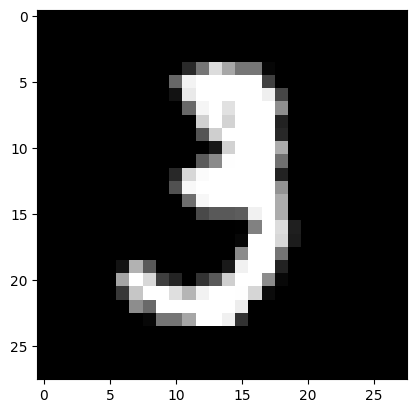

In [ ]:
plt.imshow(x_train_norm[10], cmap='gray')

# build the CNN autoencoder

In [ ]:
my_model = tf.keras.Sequential()

#encoder
my_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
my_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#decoder
my_model.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=2, padding='same', activation='relu'))
my_model.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=2, padding='same', activation='relu'))

#output layer. Expected output shape (28,28,1)
my_model.add(tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid'))

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248      
 anspose)                                                        
                                                        

In [ ]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss="binary_crossentropy",
                 metrics=['mean_squared_error'])

In [ ]:
os.mkdir('logs')

FileExistsError: [Errno 17] File exists: 'logs'

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    './logs/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
)

In [ ]:
# fit without augmentations
history = my_model.fit(x=x_train_norm,
                        y=x_train_norm,
                        batch_size=64,
                        epochs=100,
                        verbose=1,
                       validation_split = 0.2,
                       callbacks = [model_checkpoint])

Epoch 1/100
750/750 [==============================] - 10s 6ms/step - loss: 0.1156 - mean_squared_error: 0.0186 - val_loss: 0.0718 - val_mean_squared_error: 0.0036
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0694 - mean_squared_error: 0.0029 - val_loss: 0.0688 - val_mean_squared_error: 0.0026
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0676 - mean_squared_error: 0.0024 - val_loss: 0.0675 - val_mean_squared_error: 0.0022
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0666 - mean_squared_error: 0.0021 - val_loss: 0.0667 - val_mean_squared_error: 0.0020
Epoch 5/100
750/750 [==============================] - 5s 7ms/step - loss: 0.0659 - mean_squared_error: 0.0019 - val_loss: 0.0660 - val_mean_squared_error: 0.0018
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0653 - mean_squared_error: 0.0017 - val_loss: 0.0656 - val_mean_squared_error: 0.0017
Epoch 7/100
750/750 [

KeyboardInterrupt: 

In [ ]:
best_model = tf.keras.models.load_model('/content/logs/best_model.keras')

In [ ]:
input_img = np.expand_dims(x_test_norm[10], axis=0)

In [ ]:
input_img.shape

(1, 28, 28, 1)

In [ ]:
pred = best_model.predict(input_img)

1/1 [==============================] - 0s 26ms/step


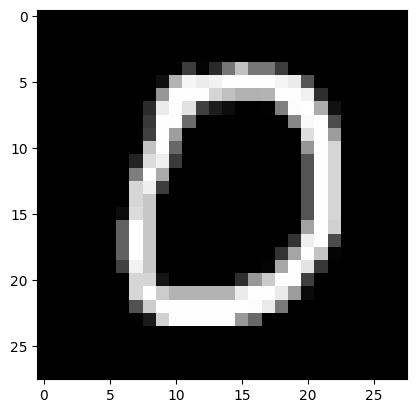

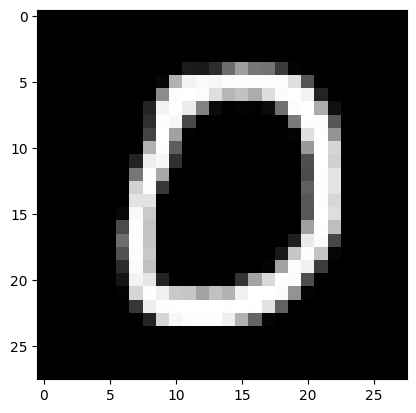

In [ ]:
plt.figure()
plt.imshow(input_img[0], cmap='gray')
print()
plt.figure()
plt.imshow(pred[0], cmap='gray')

#MNIST images denoising

In [ ]:
x_train_norm_noisy = x_train_norm + np.random.normal(loc=0, scale=0.4, size=x_train_norm.shape)
x_train_norm_noisy = np.clip(x_train_norm_noisy, 0, 1)

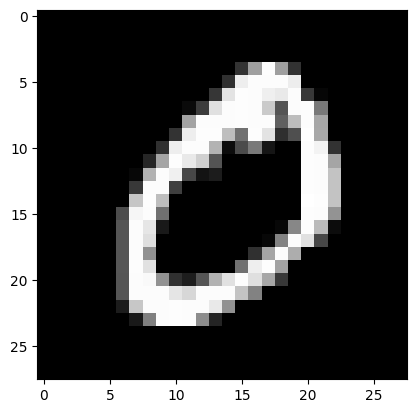

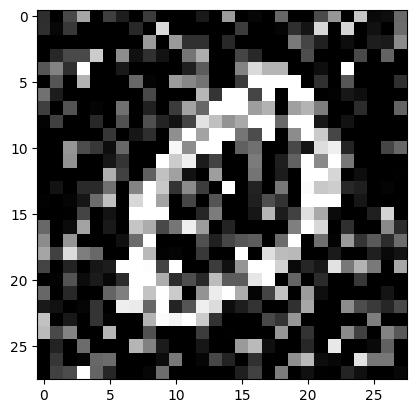

In [ ]:
plt.figure()
plt.imshow(x_train_norm[1], cmap='gray')
print()
plt.figure()
plt.imshow(x_train_norm_noisy[1], cmap='gray')

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    './logs/best_model_denoise.keras',
    monitor='val_loss',
    save_best_only=True,
)

In [ ]:
# not initializing the model weights, benefiting from transfer learning.
#My trained already has some knowledge about the dataset
history = my_model.fit(x=x_train_norm_noisy,
                        y=x_train_norm,
                        batch_size=64,
                        epochs=100,
                        verbose=1,
                       validation_split = 0.2,
                       callbacks = [model_checkpoint])

Epoch 1/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0977 - mean_squared_error: 0.0113 - val_loss: 0.0763 - val_mean_squared_error: 0.0045
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0919 - mean_squared_error: 0.0096 - val_loss: 0.0743 - val_mean_squared_error: 0.0040
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0904 - mean_squared_error: 0.0091 - val_loss: 0.0728 - val_mean_squared_error: 0.0037
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0895 - mean_squared_error: 0.0089 - val_loss: 0.0722 - val_mean_squared_error: 0.0035
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0888 - mean_squared_error: 0.0087 - val_loss: 0.0720 - val_mean_squared_error: 0.0034
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0883 - mean_squared_error: 0.0085 - val_loss: 0.0719 - val_mean_squared_error: 0.0034
Epoch 7/100
750/750 [=

KeyboardInterrupt: 

In [ ]:
x_test_norm_noisy = x_test_norm + np.random.normal(loc=0, scale=0.4, size=x_test_norm.shape)
x_test_norm_noisy = np.clip(x_test_norm_noisy, 0, 1)

In [ ]:
best_model_denoise = tf.keras.models.load_model('/content/logs/best_model_denoise.keras')

1/1 [==============================] - 0s 19ms/step




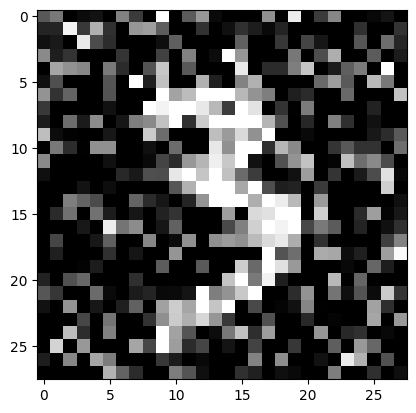

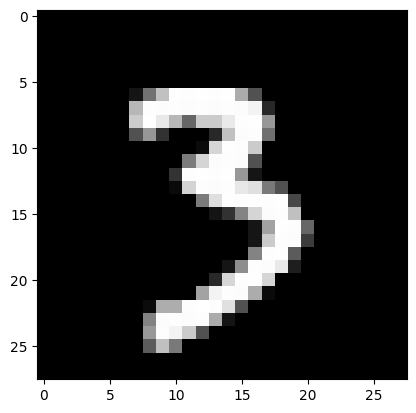

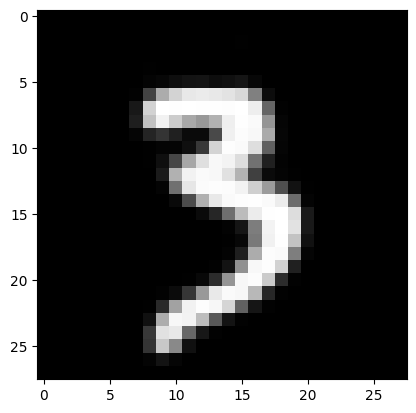

In [ ]:
test_index = 30

input_img = np.expand_dims(x_test_norm_noisy[test_index], axis=0)

pred = best_model_denoise.predict(input_img)

plt.figure()
plt.imshow(x_test_norm_noisy[test_index], cmap='gray')
print()
plt.figure()
plt.imshow(x_test_norm[test_index], cmap='gray')
print()
plt.figure()
plt.imshow(pred[0], cmap='gray')